## Final exam fall 2019
Inverted pendulum


In [1]:
import numpy as np
import sympy as sy
import control.matlab as cm
sy.init_printing(use_latex='mathjax', order='lex')

In [2]:
h,w0 = sy.symbols('h,omega0', real=True, positive=True)
s,z = sy.symbols('s,z')
t = sy.symbols('t', real=True)

In [3]:
# Zero-order hold sampling
G = w0**2/(s**2 - w0**2)
ystep = sy.inverse_laplace_transform(G/s, s, t)
sy.expand(ystep)

 ω₀⋅t                                -ω₀⋅t             
ℯ    ⋅Heaviside(t)                  ℯ     ⋅Heaviside(t)
────────────────── - Heaviside(t) + ───────────────────
        2                                    2         

In [4]:
Yz = w0**2/(2*w0**2) * ( z/(z-sy.exp(w0*h)) - 2*z/(z-1) + z/(z-sy.exp(-w0*h)))
Uz = z/(z-1)
H = sy.simplify(Yz/Uz)
sy.cancel(H)

   2⋅h⋅ω₀        h⋅ω₀        2⋅h⋅ω₀      h⋅ω₀    
z⋅ℯ       - 2⋅z⋅ℯ     + z + ℯ       - 2⋅ℯ     + 1
─────────────────────────────────────────────────
        2  h⋅ω₀        2⋅h⋅ω₀            h⋅ω₀    
     2⋅z ⋅ℯ     - 2⋅z⋅ℯ       - 2⋅z + 2⋅ℯ        

In [5]:
num, den = sy.fraction(sy.cancel(H))
den

   2  h⋅ω₀        2⋅h⋅ω₀            h⋅ω₀
2⋅z ⋅ℯ     - 2⋅z⋅ℯ       - 2⋅z + 2⋅ℯ    

In [6]:
num = sy.simplify(num/(2*sy.exp(h*w0)))
den = sy.simplify(den/(2*sy.exp(h*w0)))
den, num

⎛                                h⋅ω₀          -h⋅ω₀    h⋅ω₀        -h⋅ω₀⎞
⎜ 2      h⋅ω₀      -h⋅ω₀      z⋅ℯ           z⋅ℯ        ℯ           ℯ     ⎟
⎜z  - z⋅ℯ     - z⋅ℯ      + 1, ─────── - z + ──────── + ───── - 1 + ──────⎟
⎝                                2             2         2           2   ⎠

In [7]:
# Coefficients
dencoeffs = sy.Poly(den, z).all_coeffs()
numcoeffs = sy.Poly(num, z).all_coeffs()
dencoeffs, numcoeffs

⎛                                ⎡⎛ 2⋅h⋅ω₀      h⋅ω₀    ⎞  -h⋅ω₀  ⎛ 2⋅h⋅ω₀    
⎜⎡   ⎛   2⋅h⋅ω₀    ⎞  -h⋅ω₀   ⎤  ⎢⎝ℯ       - 2⋅ℯ     + 1⎠⋅ℯ       ⎝ℯ       - 2
⎜⎣1, ⎝- ℯ       - 1⎠⋅ℯ     , 1⎦, ⎢──────────────────────────────, ────────────
⎝                                ⎣              2                             

  h⋅ω₀    ⎞  -h⋅ω₀⎤⎞
⋅ℯ     + 1⎠⋅ℯ     ⎥⎟
──────────────────⎥⎟
  2               ⎦⎠

In [8]:
# Observable canonical form
Phi = sy.simplify(sy.Matrix([[-dencoeffs[1], 1],[-dencoeffs[2], 0]]))
Gamma2 = sy.trigsimp(sy.cancel(sy.Matrix([[numcoeffs[0]],[numcoeffs[1]]])))
C = sy.Matrix([[1, 0]])
Htest = sy.simplify(C*(z*sy.eye(2)-Phi).inv()*Gamma2)
sy.cancel(H), Htest[0]

⎛   2⋅h⋅ω₀        h⋅ω₀        2⋅h⋅ω₀      h⋅ω₀      ⎛   2⋅h⋅ω₀        h⋅ω₀    
⎜z⋅ℯ       - 2⋅z⋅ℯ     + z + ℯ       - 2⋅ℯ     + 1  ⎝z⋅ℯ       - 2⋅z⋅ℯ     + z
⎜─────────────────────────────────────────────────, ──────────────────────────
⎜        2  h⋅ω₀        2⋅h⋅ω₀            h⋅ω₀                       ⎛ 2      
⎝     2⋅z ⋅ℯ     - 2⋅z⋅ℯ       - 2⋅z + 2⋅ℯ                         2⋅⎝z  - 2⋅z

    2⋅h⋅ω₀      h⋅ω₀    ⎞  -h⋅ω₀⎞
 + ℯ       - 2⋅ℯ     + 1⎠⋅ℯ     ⎟
────────────────────────────────⎟
               ⎞                ⎟
⋅cosh(h⋅ω₀) + 1⎠                ⎠

In [9]:
Phi, Gamma2

⎛                   ⎡⎛ 2⋅h⋅ω₀      h⋅ω₀    ⎞  -h⋅ω₀⎤⎞
⎜                   ⎢⎝ℯ       - 2⋅ℯ     + 1⎠⋅ℯ     ⎥⎟
⎜⎡2⋅cosh(h⋅ω₀)  1⎤, ⎢──────────────────────────────⎥⎟
⎜⎢               ⎥  ⎢              2               ⎥⎟
⎜⎣     -1       0⎦  ⎢                              ⎥⎟
⎜                   ⎢⎛ 2⋅h⋅ω₀      h⋅ω₀    ⎞  -h⋅ω₀⎥⎟
⎜                   ⎢⎝ℯ       - 2⋅ℯ     + 1⎠⋅ℯ     ⎥⎟
⎜                   ⎢──────────────────────────────⎥⎟
⎝                   ⎣              2               ⎦⎠

In [10]:
Gamma = sy.Matrix([[sy.cosh(h*w0)-1],[sy.cosh(h*w0)-1]])
sy.simplify(Gamma2-Gamma)

⎡0⎤
⎢ ⎥
⎣0⎦

In [11]:
Phi,Gamma

⎛⎡2⋅cosh(h⋅ω₀)  1⎤, ⎡cosh(h⋅ω₀) - 1⎤⎞
⎜⎢               ⎥  ⎢              ⎥⎟
⎝⎣     -1       0⎦  ⎣cosh(h⋅ω₀) - 1⎦⎠

In [12]:
# Some numerical values
w0n = 1.0
hn = 0.2/w0n
Phi_n = np.asarray(Phi.subs({w0:w0n, h:hn})).astype(np.float64)
Gamma_n = np.asarray(Gamma.subs({w0:w0n, h:hn})).astype(np.float64)
Phi_n, Gamma_n

(array([[ 2.04013351,  1.        ],
        [-1.        ,  0.        ]]), array([[0.02006676],
        [0.02006676]]))

In [13]:
C = np.array([1., 0])
D = np.array([[0]])
sys = cm.ss(Phi_n, Gamma_n, C, D, hn)
cm.pole(sys)

array([1.22140276, 0.81873075])

In [14]:
# Desired poles: double pole in -2w0 (continuous time)
pd = np.exp(-2*w0n*hn)
L = cm.acker(A=Phi_n, B=Gamma_n,poles = [pd,pd])
L

matrix([[19.43797021, 15.42035131]])

In [15]:
L2 = np.array([[19,15]])
np.linalg.eig(Phi_n - np.dot(Gamma_n, L2))

(array([0.67893191+0.07235727j, 0.67893191-0.07235727j]),
 array([[-0.57809328-0.04268582j, -0.57809328+0.04268582j],
        [ 0.81485341+0.j        ,  0.81485341-0.j        ]]))

In [16]:
# Closed-loop system
Phic = Phi_n - np.dot(Gamma_n, L2)
sys_c = cm.ss(Phic, Gamma_n, C, D, hn)
# Steady-state solution
cm.dcgain(sys_c)

array(0.37050778)

In [17]:
l0=1/0.3705

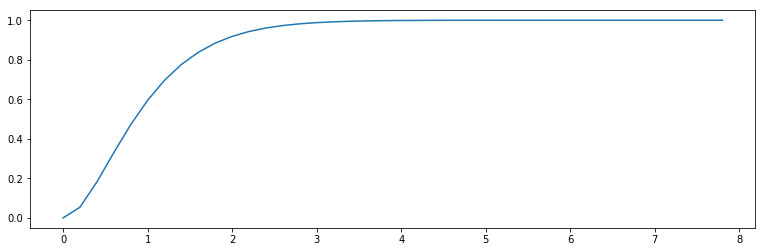

In [18]:
import matplotlib.pyplot as plt
tvec = np.arange(0,40)*hn
yout, tout =  cm.step(sys_c*2.7, tvec)
plt.figure(figsize=(13,4))
plt.plot(tout, yout)

In [19]:
cm.tf(sys_c*2.7)


  0.05418 z + 0.05418
----------------------
z^2 - 1.358 z + 0.4662

dt = 0.2

In [20]:
cm.pole(sys_c)

array([0.67893191+0.07235727j, 0.67893191-0.07235727j])

In [21]:
# Finding the deadbeat observer
CT = C.copy()
CT.shape = (2,1)
KT = cm.acker(Phi_n.T, CT, [0,0])
K = KT.T
K

matrix([[ 2.04013351],
        [-1.        ]])

In [22]:
# Verify
sys_o = cm.ss(Phi_n - np.dot(K, CT.T), Gamma_n, C, D, hn)
cm.pole(sys_o)

array([0., 0.])

### From output feedback with observer to 2dof controller

In [23]:
D_o = np.array([[l0, 0]])
sys_o = cm.ss(Phi_n - np.dot(K, CT.T)-np.dot(L2, Gamma_n), 
              np.hstack((l0*Gamma_n,K)), -L, D_o, hn)

In [24]:
cm.tf(sys_o)


Input 1 to output 1:
2.699 z^2 + 1.795 z + 0.7887
----------------------------
   z^2 + 1.365 z + 0.6823

Input 2 to output 1:
    -24.24 z + 11.1
----------------------
z^2 + 1.365 z + 0.6823

dt = 0.2

In [25]:
K

matrix([[ 2.04013351],
        [-1.        ]])

In [26]:
np.hstack((l0*Gamma_n, K))

matrix([[ 0.05416128,  2.04013351],
        [ 0.05416128, -1.        ]])